In [1]:
import scipy
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load data
EEG_before = scipy.io.loadmat('EEG_av.mat')
EEG_during = scipy.io.loadmat('EEG_pe.mat')
EEG_after = scipy.io.loadmat('EEG_ap.mat')

EEG_before = EEG_before['EEG_before']
EEG_during = EEG_during['EEG_during']
EEG_after = EEG_after['EEG_after']

# Set sampling frequency variable
fs = 512

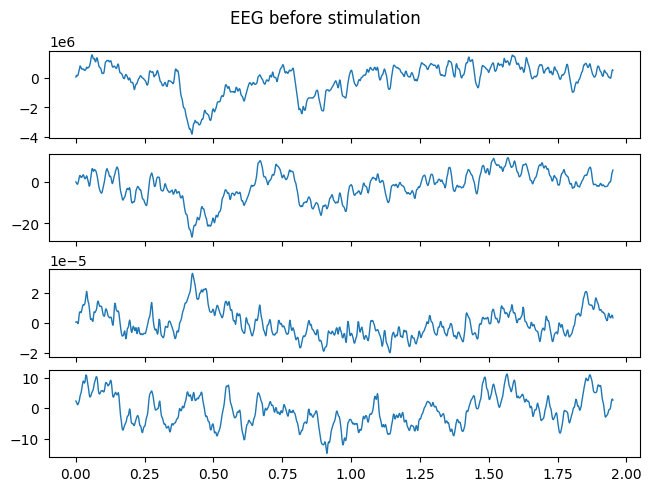

In [3]:
# Plot 4 EEG leads before stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG before stimulation')
time = np.arange(0, len(EEG_before)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_before[:, i])

In [4]:
# Perform SVD 
Ub, Sb, Vb = np.linalg.svd(EEG_before)

# Print singular values divided by max value
Before = 'Singular values before stimulation: {:.5f}, {:.5f}, {:.5f}, {:.5f}'
print(Before.format(Sb[0]/max(Sb), Sb[1]/max(Sb), Sb[2]/max(Sb), Sb[3]/max(Sb)))

Singular values before stimulation: 1.00000, 0.00001, 0.00000, 0.00000


In [11]:
# Implement here the pre-processing of the signals
EEG_before = scipy.stats.zscore(EEG_before)


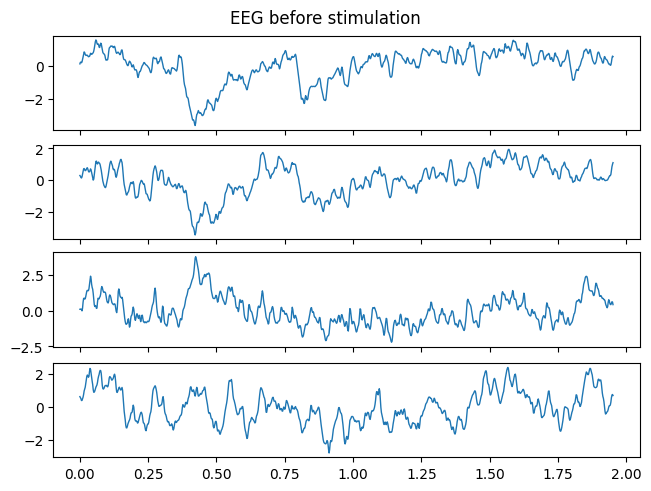

In [12]:
# Plot 4 EEG leads before stimulation after pre-processing
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG before stimulation')
time = np.arange(0, len(EEG_before)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_before[:, i])

In [13]:
# Perform here the svd 
Ub, Sb, Vb = np.linalg.svd(EEG_before)

# Print singular values divided by max value
Before = 'Singular values before stimulation: {:.5f}, {:.5f}, {:.5f}, {:.5f}'
print(Before.format(Sb[0]/max(Sb), Sb[1]/max(Sb), Sb[2]/max(Sb), Sb[3]/max(Sb)))

Singular values before stimulation: 1.00000, 0.82741, 0.27099, 0.23259


In [8]:
# Implement here the pre-processing of the signals during and after stimulation

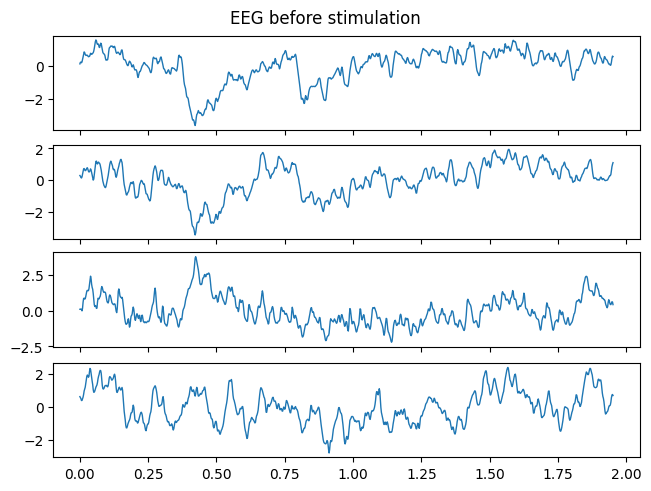

In [9]:
# Plot 4 EEG leads before stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG before stimulation')
time = np.arange(0, len(EEG_before)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_before[:, i])

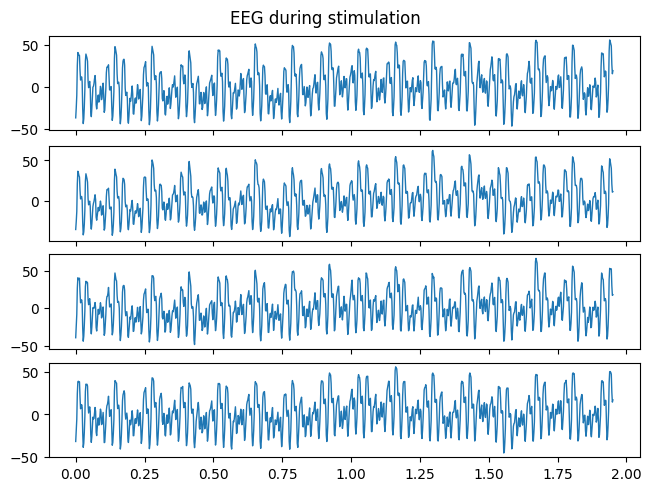

In [10]:
# Plot 4 EEG leads during stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG during stimulation')
time = np.arange(0, len(EEG_during)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_during[:, i])

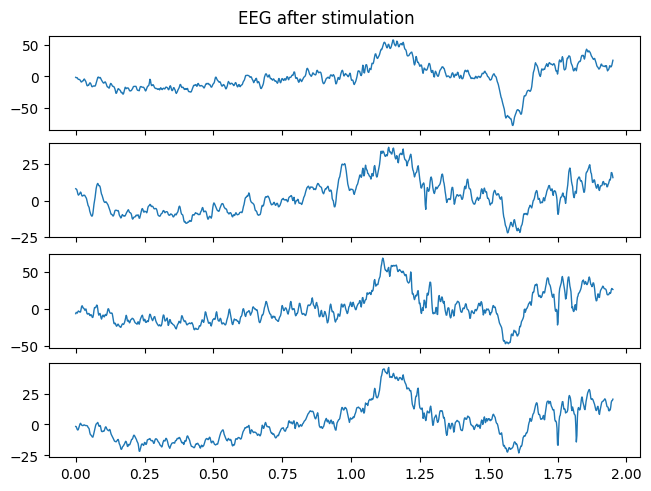

In [11]:
# Plot 4 EEG leads after stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG after stimulation')
time = np.arange(0, len(EEG_after)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_after[:, i])

In [12]:
Ub, Sb, Vb = np.linalg.svd(EEG_before)
Ud, Sd, Vd = np.linalg.svd(EEG_during)
Ua, Sa, Va = np.linalg.svd(EEG_after)
# Print singular values
Before = 'Singular values before: {:.2f}, {:.2f}, {:.2f}, {:.2f}'
print(Before.format(Sb[0]/max(Sb), Sb[1]/max(Sb), Sb[2]/max(Sb), Sb[3]/max(Sb)))
Before = 'Singular values during: {:.2f}, {:.2f}, {:.2f}, {:.2f}'
print(Before.format(Sd[0]/max(Sd), Sd[1]/max(Sd), Sd[2]/max(Sd), Sd[3]/max(Sd)))
Before = 'Singular values after: {:.2f}, {:.2f}, {:.2f}, {:.2f}'
print(Before.format(Sa[0]/max(Sa), Sa[1]/max(Sa), Sa[2]/max(Sa), Sa[3]/max(Sa)))

Singular values before: 1.00, 0.83, 0.27, 0.23
Singular values during: 1.00, 0.10, 0.07, 0.07
Singular values after: 1.00, 0.21, 0.19, 0.09


ValueError: operands could not be broadcast together with shapes (1000,4) (1000,1000) 

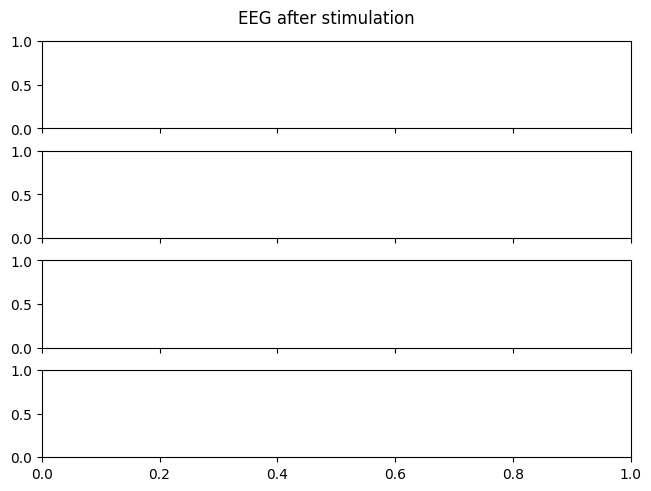

In [25]:
# Plot 4 EEG leads after stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG after stimulation')
time = np.arange(0, len(EEG_after)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_after*Ua)

In [31]:
len(EEG_after[0])

4

In [32]:
len(EEG_after)

1000

[1, 2, 3, 4]

[[1], [2], [3], [4]]

AttributeError: 'list' object has no attribute 'shape'